<a href="https://colab.research.google.com/github/DaramG-star/TIL/blob/master/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 폰트설치

In [1]:
# 한글 폰트 설치 (나눔고딕)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 꺼내기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

file_path = "/insurance.csv"

df = pd.read_csv(file_path, encoding='euc-kr')
df.head()  # 데이터 확인

,성별,연령대,거주 지역,거주 형태,소득 수준,현재 가입한 보험,보험 가입 이유,보험 가입 고려 요소,보험 지식 수준,1인 가구 여부,보험 가입 망설임 이유,본인 가구 맞춤 보험 필요성,고독사 확인 서비스 인지 여부,고독사 확인 서비스 필요성,반려동물 여부,펫보험 가입 고려,고독사 확인 서비스 방식
0,1,30대,3,2,4,"1, 2, 3, 4",1,4,4,0,1,2,3,5,4,1,1
1,2,40대,3,4,4,"1, 2, 3, 4",2,1,3,0,4,2,4,5,4,1,1
2,1,40대,2,2,2,"1, 2, 3, 4",2,3,4,0,4,2,4,5,4,1,1
3,1,30대,3,2,0,"1, 2, 3, 4",1,3,2,0,1,2,3,5,4,1,1
4,2,20대,3,2,4,6,1,5,2,0,1,2,3,5,4,1,1


# EDA

## 보험 미가입률 (연령대, 가구유형)

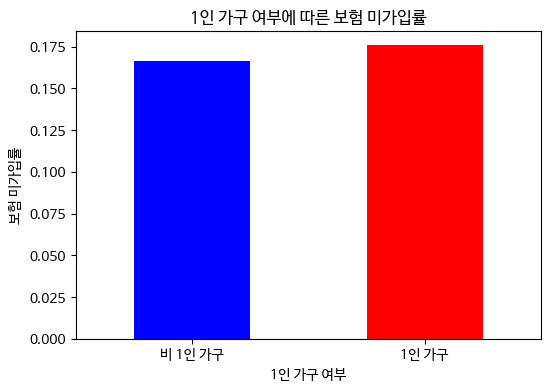

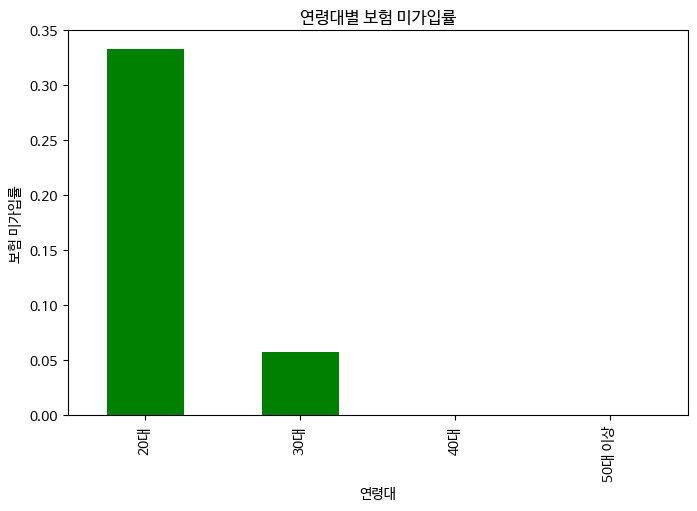

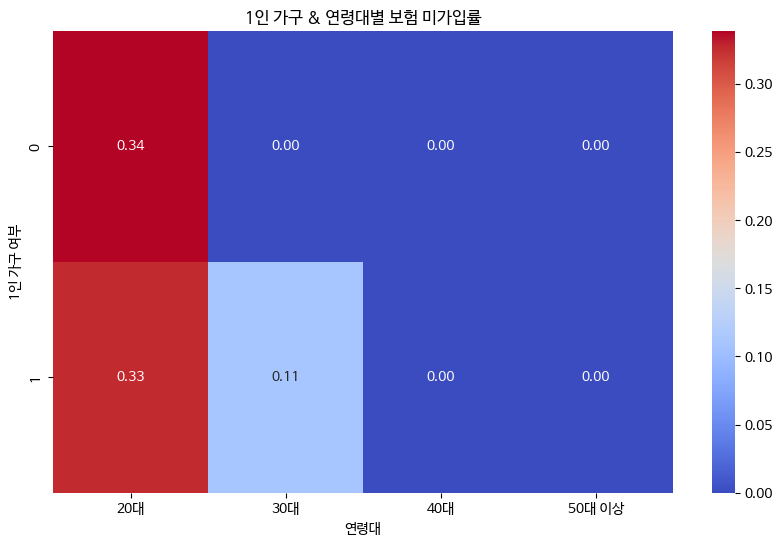

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')


# 현재 가입한 보험 값이 쉼표로 구분된 문자열이므로 리스트로 변환 후 '6' 포함 여부 확인
df['보험 미가입 여부'] = df['현재 가입한 보험'].apply(lambda x: 1 if '6' in str(x).replace(" ", "").split(',') else 0)

# 1인 가구 여부에 따른 보험 미가입률
insurance_non_rate_by_single = df.groupby('1인 가구 여부')['보험 미가입 여부'].mean()

# 시각화
plt.figure(figsize=(6, 4))
insurance_non_rate_by_single.plot(kind='bar', color=['blue', 'red'])
plt.title("1인 가구 여부에 따른 보험 미가입률")
plt.xlabel("1인 가구 여부")
plt.ylabel("보험 미가입률")
plt.xticks(ticks=[0, 1], labels=["비 1인 가구", "1인 가구"], rotation=0)
plt.show()


# 연령대별 보험 미가입률
insurance_non_rate_by_age = df.groupby('연령대')['보험 미가입 여부'].mean()

# 시각화
plt.figure(figsize=(8, 5))
insurance_non_rate_by_age.plot(kind='bar', color='green')
plt.title("연령대별 보험 미가입률")
plt.xlabel("연령대")
plt.ylabel("보험 미가입률")
plt.show()


# 1인 가구 & 연령대 조합에 따른 보험 미가입률 (교차 분석)
insurance_non_rate_by_single_age = df.groupby(['1인 가구 여부', '연령대'])['보험 미가입 여부'].mean().unstack()

# 시각화 (히트맵 Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(insurance_non_rate_by_single_age, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("1인 가구 & 연령대별 보험 미가입률")
plt.xlabel("연령대")
plt.ylabel("1인 가구 여부")
plt.xticks(rotation=0)
plt.show()


## 본인 가구 맞춤 보험 필요성

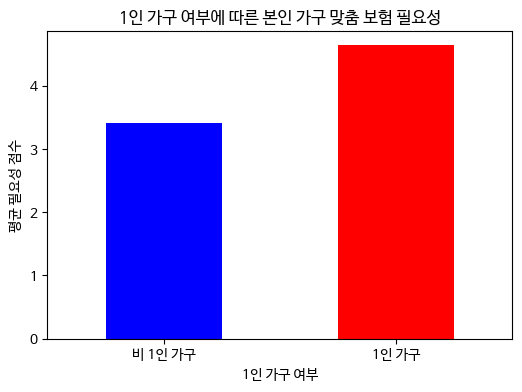

<ipython-input-6-0688586e3ca1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="1인 가구 여부", y="본인 가구 맞춤 보험 필요성", data=df, palette=["blue", "red"])


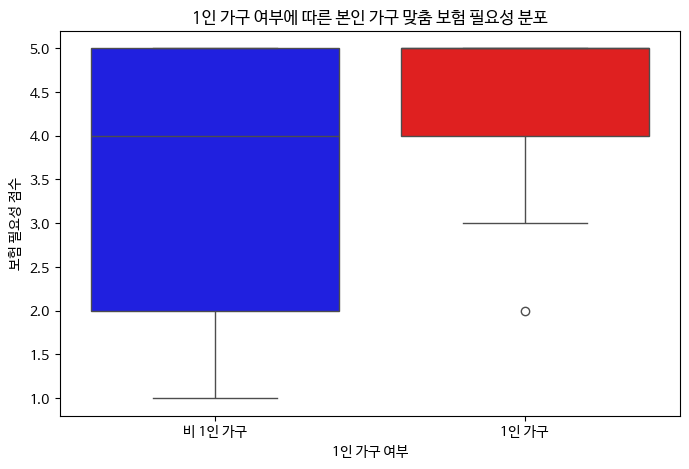

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 1인 가구 여부별 본인 가구 맞춤 보험 필요성 평균 계산
insurance_need_by_single = df.groupby('1인 가구 여부')['본인 가구 맞춤 보험 필요성'].mean()

# 시각화: 평균값 비교 (막대 그래프)
plt.figure(figsize=(6, 4))
insurance_need_by_single.plot(kind='bar', color=['blue', 'red'])
plt.title("1인 가구 여부에 따른 본인 가구 맞춤 보험 필요성")
plt.xlabel("1인 가구 여부")
plt.ylabel("평균 필요성 점수")
plt.xticks(ticks=[0, 1], labels=["비 1인 가구", "1인 가구"], rotation=0)
plt.show()

# 시각화: 필요성 점수의 분포 비교 (박스플롯)
plt.figure(figsize=(8, 5))
sns.boxplot(x="1인 가구 여부", y="본인 가구 맞춤 보험 필요성", data=df, palette=["blue", "red"])
plt.title("1인 가구 여부에 따른 본인 가구 맞춤 보험 필요성 분포")
plt.xlabel("1인 가구 여부")
plt.ylabel("보험 필요성 점수")
plt.xticks(ticks=[0, 1], labels=["비 1인 가구", "1인 가구"])
plt.show()


## 펫보험 가입 고려

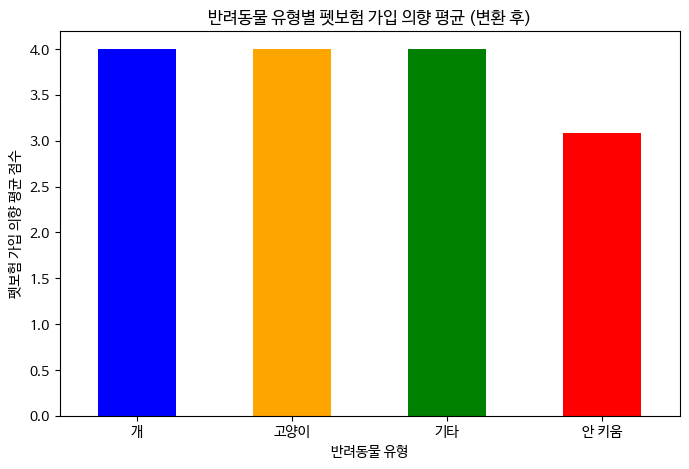

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 펫보험 가입 고려 점수 변환 (내림차순 → 오름차순)
df['펫보험 가입 고려'] = df['펫보험 가입 고려'].replace({1: 4, 2: 3, 3: 2, 4: 1})

# 반려동물 유형별 펫보험 가입 의향 평균 계산
pet_insurance_mean = df.groupby('반려동물 여부')['펫보험 가입 고려'].mean()

# 시각화: 평균 비교 (막대 그래프)
plt.figure(figsize=(8, 5))
pet_insurance_mean.sort_values(ascending=False).plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title("반려동물 유형별 펫보험 가입 의향 평균 (변환 후)")
plt.xlabel("반려동물 유형")
plt.ylabel("펫보험 가입 의향 평균 점수")
plt.xticks(ticks=[0, 1, 2, 3], labels=["개", "고양이", "기타", "안 키움"], rotation=0)
plt.show()


## 연령대, 가구유형 별 고독사 서비스 인지 여부, 필요성

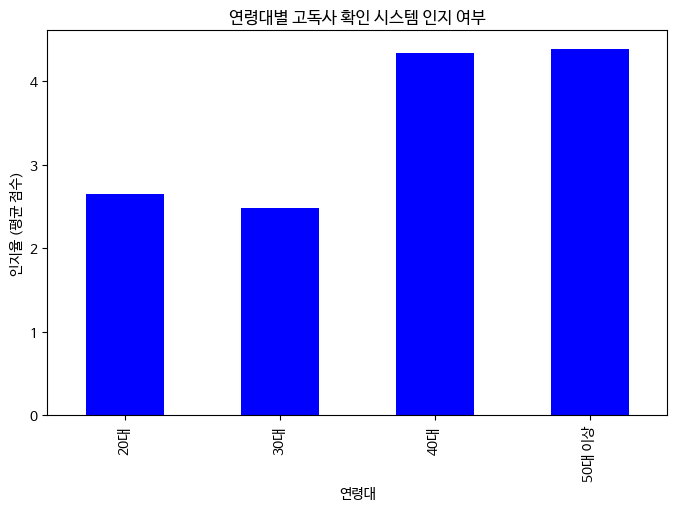

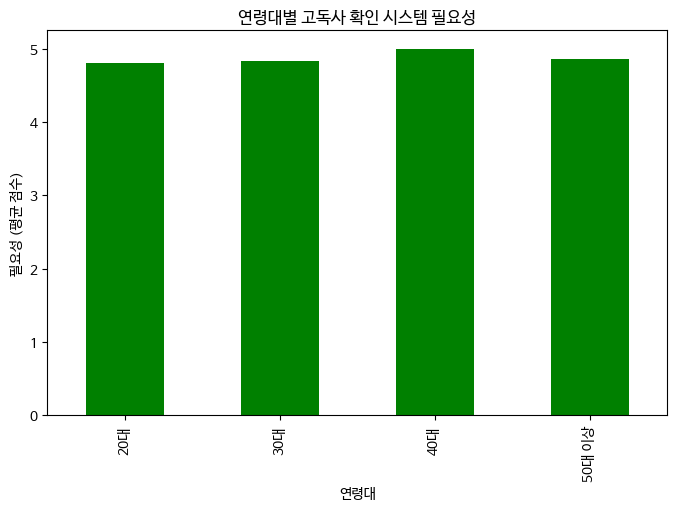

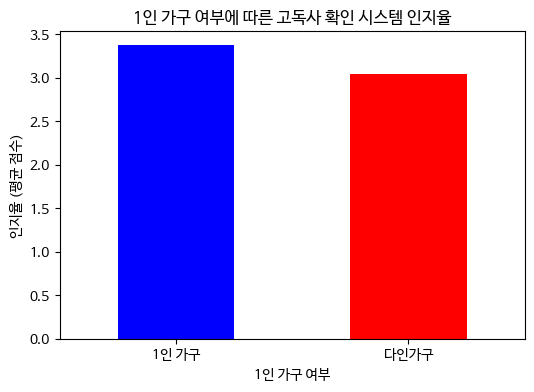

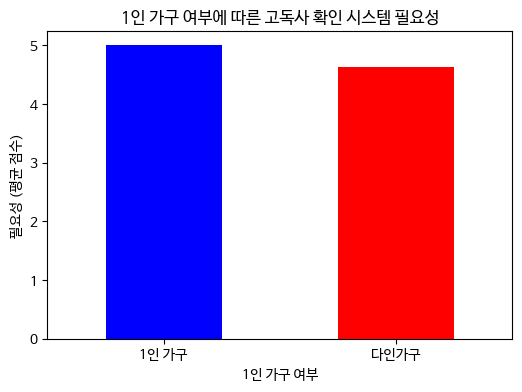

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 연령대별 고독사 확인 시스템 인지 여부
awareness_by_age = df.groupby("연령대")["고독사 확인 서비스 인지 여부"].mean()

# 시각화 (막대 그래프)
plt.figure(figsize=(8, 5))
awareness_by_age.plot(kind="bar", color="blue")
plt.title("연령대별 고독사 확인 시스템 인지 여부")
plt.xlabel("연령대")
plt.ylabel("인지율 (평균 점수)")
plt.show()

# 연령대별 고독사 확인 시스템 필요성
necessity_by_age = df.groupby("연령대")["고독사 확인 서비스 필요성"].mean()

# 시각화 (막대 그래프)
plt.figure(figsize=(8, 5))
necessity_by_age.plot(kind="bar", color="green")
plt.title("연령대별 고독사 확인 시스템 필요성")
plt.xlabel("연령대")
plt.ylabel("필요성 (평균 점수)")
plt.show()

# 1인 가구 vs 다인가구 고독사 시ㅠ스템 인지 여부
awareness_by_household = df.groupby("1인 가구 여부")["고독사 확인 서비스 인지 여부"].mean()

# 시각화 (막대 그래프)
plt.figure(figsize=(6, 4))
awareness_by_household.plot(kind="bar", color=["blue", "red"])
plt.title("1인 가구 여부에 따른 고독사 확인 시스템 인지율")
plt.xlabel("1인 가구 여부")
plt.ylabel("인지율 (평균 점수)")
plt.xticks(ticks=[1, 0], labels=["다인가구", "1인 가구"], rotation=0)
plt.show()

# 1인 가구 vs 다인가구 고독사 시스템 필요성
necessity_by_household = df.groupby("1인 가구 여부")["고독사 확인 서비스 필요성"].mean()

# 시각화 (막대 그래프)
plt.figure(figsize=(6, 4))
necessity_by_household.plot(kind="bar", color=["blue", "red"])
plt.title("1인 가구 여부에 따른 고독사 확인 시스템 필요성")
plt.xlabel("1인 가구 여부")
plt.ylabel("필요성 (평균 점수)")
plt.xticks(ticks=[1, 0], labels=["다인가구", "1인 가구"], rotation=0)
plt.show()


# 통계분석

## T 검정

### 고독사 확인 서비스 필요성

In [22]:
# 1인 가구와 다인가구 그룹 분리
single_household = df[df['1인 가구 여부'] == 0]['고독사 확인 서비스 필요성']
multi_household = df[df['1인 가구 여부'] == 1]['고독사 확인 서비스 필요성']

# 독립 t-검정 수행
t_stat, p_value = stats.ttest_ind(single_household, multi_household, equal_var=False)

print("1인 가구 vs 다인가구 고독사 확인 서비스 필요성 t-검정 결과:")
print(f"T-statistic: {t_stat}, p-value: {p_value}")

# 1인 가구와 다인가구의 평균 필요성 비교
mean_single = single_household.mean()
mean_multi = multi_household.mean()

print(f"1인 가구 고독사 확인 서비스 필요성 평균: {mean_single}")
print(f"다인가구 고독사 확인 서비스 필요성 평균: {mean_multi}")


1인 가구 vs 다인가구 고독사 확인 서비스 필요성 t-검정 결과:
T-statistic: 5.023960058807099, p-value: 2.5505247463239843e-06
1인 가구 고독사 확인 서비스 필요성 평균: 5.0
다인가구 고독사 확인 서비스 필요성 평균: 4.626373626373627


T검정 값이 양수라는 것은 1인가구의 평균 고독사 확인 서비스 필요성이 다인가구보다 높다는 것을 의미

Pvalue < 0.05 이므로 1인가구와 다인가구 간 고독사 확인 서비스 필요성 차이가 유의미함

### 본인 가구 맞춤 보험 필요성

In [25]:
# 본인 가구 맞춤 보험 필요성 비교
single_household = df[df['1인 가구 여부'] == 1]['본인 가구 맞춤 보험 필요성']
multi_household = df[df['1인 가구 여부'] == 0]['본인 가구 맞춤 보험 필요성']
t_stat, p_value = stats.ttest_ind(single_household, multi_household, equal_var=False)
print(f"1인 가구 vs 다인가구 본인 가구 맞춤 보험 필요성 t-검정: T={t_stat}, p={p_value}")

# 고독사 확인 서비스 필요성 비교
single_household = df[df['1인 가구 여부'] == 0]['고독사 확인 서비스 필요성']
multi_household = df[df['1인 가구 여부'] == 1]['고독사 확인 서비스 필요성']
t_stat, p_value = stats.ttest_ind(single_household, multi_household, equal_var=False)
print(f"1인 가구 vs 다인가구 고독사 서비스 필요성 t-검정: T={t_stat}, p={p_value}")

# 펫보험 가입 고려 비교
single_household = df[df['1인 가구 여부'] == 0]['펫보험 가입 고려']
multi_household = df[df['1인 가구 여부'] == 1]['펫보험 가입 고려']
t_stat, p_value = stats.ttest_ind(single_household, multi_household, equal_var=False)
print(f"1인 가구 vs 다인가구 펫보험 필요성 t-검정: T={t_stat}, p={p_value}")


1인 가구 vs 다인가구 본인 가구 맞춤 보험 필요성 t-검정: T=8.467714872344684, p=8.566861709461139e-15
1인 가구 vs 다인가구 고독사 서비스 필요성 t-검정: T=5.023960058807099, p=2.5505247463239843e-06
1인 가구 vs 다인가구 펫보험 필요성 t-검정: T=6.286934662079403, p=1.1378989205062462e-08


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


**본인 가구 맞춤 보험 필요성 (T = 8.47, p ≈ 0)**

1인 가구가 다인가구보다 본인 가구 맞춤 보험을 더 필요로 함

T값이 양수, 즉 1인 가구의 평균 필요성이 더 높음

p-value ≈ 0 → 통계적으로 매우 유의미한 차이

결론: 1인 가구는 다인가구보다 본인 가구 맞춤 보험의 필요성을 강하게 느낌

---

**고독사 서비스 필요성 (T = 5.02, p ≈ 0)**

1인 가구가 다인가구보다 고독사 서비스 필요성을 더 느낌

T값이 양수, 즉 1인 가구의 평균 필요성이 더 높음

p-value ≈ 0 → 통계적으로 유의미한 차이

결론: 1인 가구는 다인가구보다 고독사 확인 서비스의 필요성을 더 크게 인식하고 있음

---

**펫보험 필요성 (T = 6.29, p ≈ 0)**

✅ 1인 가구가 다인가구보다 펫보험 필요성을 더 느낌

T값이 양수, 즉 1인 가구의 평균 필요성이 더 높음

p-value ≈ 0 → 통계적으로 유의미한 차이

결론: 1인 가구는 다인가구보다 펫보험의 필요성을 더 크게 느낌


# 카이제곱 검정

In [26]:
# 연령대별 보험 가입 이유 차이 검정 (카이제곱)
contingency_table = pd.crosstab(df['연령대'], df['보험 가입 이유'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"연령대별 보험 가입 이유 차이 카이제곱 검정: Chi-square={chi2}, p={p}")


연령대별 보험 가입 이유 차이 카이제곱 검정: Chi-square=94.07793902243884, p=4.301110756595168e-18


In [27]:
# 연령대별 선호하는 보험 유형 차이 검정 (카이제곱)
contingency_table = pd.crosstab(df['연령대'], df['현재 가입한 보험'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"연령대별 선호하는 보험 유형 차이 카이제곱 검정: Chi-square={chi2}, p={p}")


연령대별 선호하는 보험 유형 차이 카이제곱 검정: Chi-square=211.5266903266903, p=1.9370968375753578e-21


**연령대별 보험 가입 이유, 선호하는 보험 유형 차이 카이제곱 검정 결과 해석**

Chi-square = 94.08

→ 카이제곱 값이 높다는 것은 연령대별 보험 가입 이유에 큰 차이가 있음을 의미

p-value = 4.3e-18 (≈ 0)

→ p < 0.05이므로 연령대별 보험 가입 이유 차이가 통계적으로 유의미함!

In [30]:
# 카이제곱 검정 (1인 가구 vs 다인가구 보험 가입 망설임 이유)
contingency_table = pd.crosstab(df["1인 가구 여부"], df["보험 가입 망설임 이유"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"1인 가구 vs 다인가구 보험 가입 망설임 이유 카이제곱 검정: Chi-square={chi2}, p={p}")

1인 가구 vs 다인가구 보험 가입 망설임 이유 카이제곱 검정: Chi-square=112.37331716331717, p=3.384779001480507e-24


<Figure size 800x500 with 0 Axes>

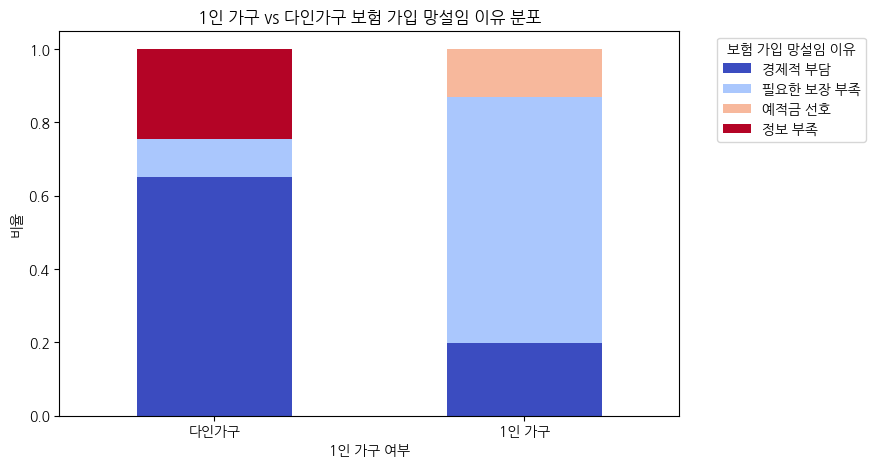

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 적용 (Colab 사용 시 필요)
plt.rc('font', family='NanumGothic')

# 1인 가구 vs 다인가구 보험 가입 망설임 이유 비율 계산
insurance_hesitation_dist = pd.crosstab(df["1인 가구 여부"], df["보험 가입 망설임 이유"], normalize="index")

# 시각화 (스택드 바 차트 - 보험 가입 망설임 이유)
plt.figure(figsize=(8, 5))
insurance_hesitation_dist.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(8, 5))
plt.title("1인 가구 vs 다인가구 보험 가입 망설임 이유 분포")
plt.xlabel("1인 가구 여부")
plt.ylabel("비율")
plt.xticks(ticks=[0, 1], labels=["다인가구", "1인 가구"], rotation=0)
plt.legend(title="보험 가입 망설임 이유", labels=["경제적 부담", "필요한 보장 부족", "예적금 선호", "정보 부족"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


1인가구는 필요한 보장이 부족하여 보험가입을 망설이게 된다고 함.

<Figure size 1000x600 with 0 Axes>

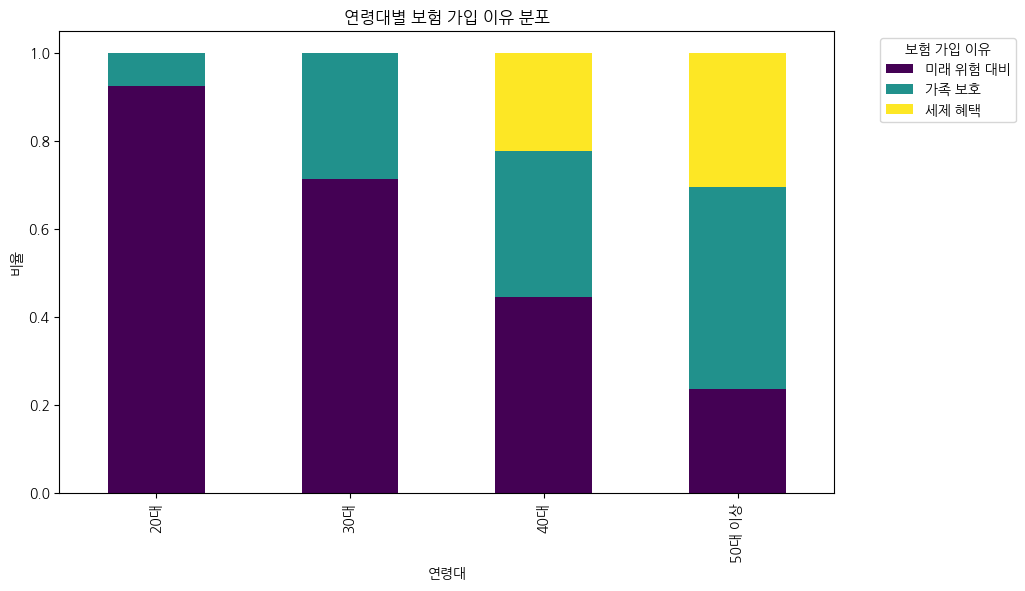

<Figure size 1000x600 with 0 Axes>

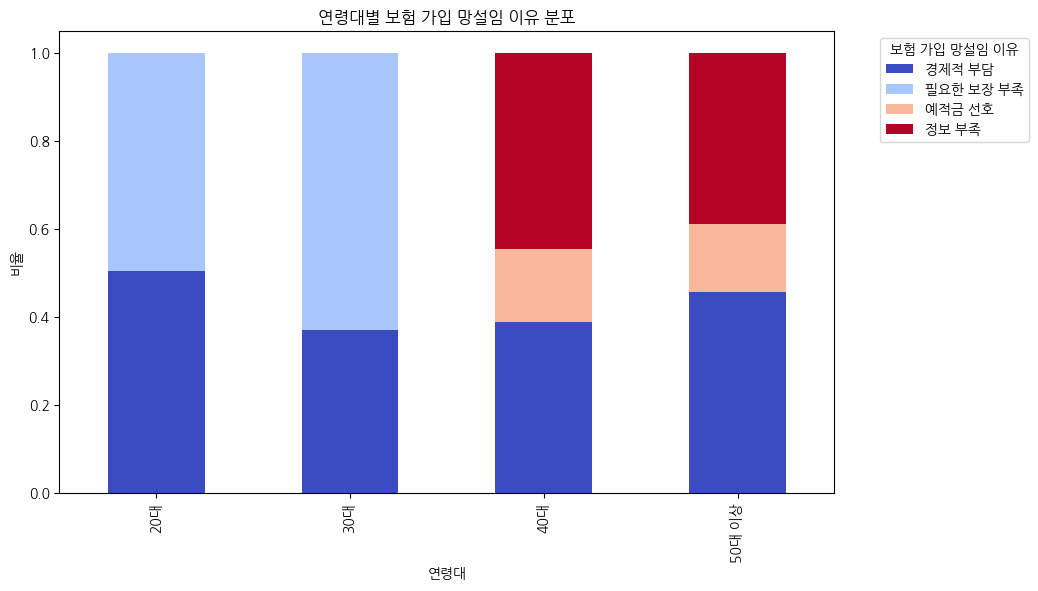

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 적용 (Colab 사용 시 필요)
plt.rc('font', family='NanumGothic')

# 연령대별 보험 가입 이유 비율 계산
insurance_reason_dist = pd.crosstab(df["연령대"], df["보험 가입 이유"], normalize="index")

# 시각화 (스택드 바 차트 - 보험 가입 이유)
plt.figure(figsize=(10, 6))
insurance_reason_dist.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("연령대별 보험 가입 이유 분포")
plt.xlabel("연령대")
plt.ylabel("비율")
plt.legend(title="보험 가입 이유", labels=["미래 위험 대비", "가족 보호", "세제 혜택", "금융상품 투자"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# 연령대별 보험 가입 망설임 이유 비율 계산
insurance_hesitation_dist = pd.crosstab(df["연령대"], df["보험 가입 망설임 이유"], normalize="index")

# 시각화 (스택드 바 차트 - 보험 가입 망설임 이유)
plt.figure(figsize=(10, 6))
insurance_hesitation_dist.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("연령대별 보험 가입 망설임 이유 분포")
plt.xlabel("연령대")
plt.ylabel("비율")
plt.legend(title="보험 가입 망설임 이유", labels=["경제적 부담", "필요한 보장 부족", "예적금 선호", "정보 부족"], bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


## Anova 검정

In [23]:
from scipy.stats import f_oneway

# 연령대별 데이터 분리
age_groups = [df[df['연령대'] == age]['고독사 확인 서비스 필요성'] for age in df['연령대'].unique()]

# ANOVA 수행
f_stat, p_value = f_oneway(*age_groups)

print("연령대별 고독사 확인 서비스 필요성 ANOVA 결과:")
print(f"F-statistic: {f_stat}, p-value: {p_value}")


연령대별 고독사 확인 서비스 필요성 ANOVA 결과:
F-statistic: 0.8120891600752633, p-value: 0.48842341582936866


연령대별로 고독사 확인 서비스가 필요하고 아니고는 크게 차이가 없음.

In [29]:
from scipy.stats import f_oneway

# 연령대별 보험 지식 수준 데이터 그룹화
age_groups = [df[df["연령대"] == age]["보험 지식 수준"] for age in df["연령대"].unique()]

# ANOVA 수행
f_stat, p_value = f_oneway(*age_groups)

print(f"연령대별 보험 지식 수준 ANOVA 결과: F-statistic={f_stat}, p-value={p_value}")


연령대별 보험 지식 수준 ANOVA 결과: F-statistic=1.1991251594470405, p-value=0.31107837896562057
